In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [3]:
df = pd.read_csv('''./Data/ShanghaiPMI25_tr.csv''')
df.head()

,No,year,month,day,hour,season,PM_Jingan,DEWP,HUMI,PRES,TEMP,cbwd,Iws,precipitation,Iprec
0,26305,2013,1,1,0,4,66,-5,69.00,1023,0,SW,60,0.0,0.0
1,26306,2013,1,1,1,4,67,-5,69.00,1023,0,SW,62,0.0,0.0
2,26308,2013,1,1,3,4,73,-4,74.41,1023,0,SW,65,0.0,0.0
3,26309,2013,1,1,4,4,75,-4,80.04,1023,-1,SW,68,0.0,0.0
4,26310,2013,1,1,5,4,73,-4,80.04,1023,-1,SW,70,0.0,0.0


In [4]:
def mu_sigma(x):
    return { 'mean' : sum(x)/len(x), 'std' : np.sqrt(np.mean([a ** 2 for a in [a - np.mean(x) for a in x]])) }


In [5]:
print(len(df['cbwd']))

df['N'] = pd.Series([1 if 'N' in x else 0 for x in df['cbwd']], index=df.index)
df['S'] = pd.Series([1 if 'S' in x else 0 for x in df['cbwd']], index=df.index)
df['E'] = pd.Series([1 if 'E' in x else 0 for x in df['cbwd']], index=df.index)
df['W'] = pd.Series([1 if 'W' in x else 0 for x in df['cbwd']], index=df.index)
df.head()

13164


,No,year,month,day,hour,season,PM_Jingan,DEWP,HUMI,PRES,TEMP,cbwd,Iws,precipitation,Iprec,N,S,E,W
0,26305,2013,1,1,0,4,66,-5,69.00,1023,0,SW,60,0.0,0.0,0,1,0,1
1,26306,2013,1,1,1,4,67,-5,69.00,1023,0,SW,62,0.0,0.0,0,1,0,1
2,26308,2013,1,1,3,4,73,-4,74.41,1023,0,SW,65,0.0,0.0,0,1,0,1
3,26309,2013,1,1,4,4,75,-4,80.04,1023,-1,SW,68,0.0,0.0,0,1,0,1
4,26310,2013,1,1,5,4,73,-4,80.04,1023,-1,SW,70,0.0,0.0,0,1,0,1


In [6]:
columns = [x for x in df.columns[2:15]]
del columns[9]
print(columns)

['month', 'day', 'hour', 'season', 'PM_Jingan', 'DEWP', 'HUMI', 'PRES', 'TEMP', 'cbwd', 'Iws', 'precipitation', 'Iprec']
['month', 'day', 'hour', 'season', 'PM_Jingan', 'DEWP', 'HUMI', 'PRES', 'TEMP', 'Iws', 'precipitation', 'Iprec']


In [7]:
df['year'] = df['year'] - 2013
df.head()


,No,year,month,day,hour,season,PM_Jingan,DEWP,HUMI,PRES,TEMP,cbwd,Iws,precipitation,Iprec,N,S,E,W
0,26305,0,1,1,0,4,66,-5,69.00,1023,0,SW,60,0.0,0.0,0,1,0,1
1,26306,0,1,1,1,4,67,-5,69.00,1023,0,SW,62,0.0,0.0,0,1,0,1
2,26308,0,1,1,3,4,73,-4,74.41,1023,0,SW,65,0.0,0.0,0,1,0,1
3,26309,0,1,1,4,4,75,-4,80.04,1023,-1,SW,68,0.0,0.0,0,1,0,1
4,26310,0,1,1,5,4,73,-4,80.04,1023,-1,SW,70,0.0,0.0,0,1,0,1


In [8]:
import pickle 
def normalize_dataset(df):
    normalization_parameters = []
    
    
    for column in columns:
        normalization_parameters.append((mu_sigma(df[column])['mean'],mu_sigma(df[column])['std']))
        df[column] = (df[column] - mu_sigma(df[column])['mean'])/mu_sigma(df[column])['std']
        
    print(normalization_parameters)
    
    #save normalized values to file 
    with open(r"data/normalized.bin", "wb" )  as fh:
        pickle.dump(df, fh)  
    
    #save means and std used to normalize data to file
    #stored as (mean, std) for area, bedrooms, price in that order
    with open(r"data/normalization_parameters.bin", "wb" )  as fh2:
        pickle.dump(normalization_parameters, fh2)  
    
normalize_dataset(df)
df.head()

[(5.867517471893041, 3.2315548438053523), (15.748784563962321, 8.865980403749866), (11.675478577939836, 6.8643785911835664), (2.3315861440291705, 1.1432502590264095), (59.925478577939835, 52.408420142759446), (11.492175630507445, 9.6155046810445555), (67.61712473412328, 18.052448079623893), (1015.0474779702218, 8.7531186709819711), (18.218626557277425, 9.3050647052046802), (48.98169249468247, 69.968725155170631), (0.13961561835308367, 1.1072490642825892), (1.1161577028258913, 8.9453039054663908)]


,No,year,month,day,hour,season,PM_Jingan,DEWP,HUMI,PRES,TEMP,cbwd,Iws,precipitation,Iprec,N,S,E,W
0,26305,0,-1.506246,-1.663526,-1.700879,1.45936,0.115907,-1.715165,0.076603,0.908536,-1.957926,SW,0.157475,-0.126092,-0.124776,0,1,0,1
1,26306,0,-1.506246,-1.663526,-1.555200,1.45936,0.134988,-1.715165,0.076603,0.908536,-1.957926,SW,0.186059,-0.126092,-0.124776,0,1,0,1
2,26308,0,-1.506246,-1.663526,-1.263840,1.45936,0.249474,-1.611166,0.376286,0.908536,-1.957926,SW,0.228935,-0.126092,-0.124776,0,1,0,1
3,26309,0,-1.506246,-1.663526,-1.118161,1.45936,0.287635,-1.611166,0.688155,0.908536,-2.065394,SW,0.271812,-0.126092,-0.124776,0,1,0,1
4,26310,0,-1.506246,-1.663526,-0.972481,1.45936,0.249474,-1.611166,0.688155,0.908536,-2.065394,SW,0.300396,-0.126092,-0.124776,0,1,0,1


In [9]:
def calc_gradient(y,X,w):
    assert X.shape[0] == y.shape[0]
    assert X.shape[1] == w.shape[0]
    assert y.shape[1] == w.shape[1] == 1
    

    return {'gradient':(1/(y.shape[0]) * np.transpose(X).dot(((X.dot(w))- y))),'loss': (1/(2*y.shape[0])) * (np.transpose(((X.dot(w))- y)).dot(((X.dot(w))- y))) }

In [10]:
with open(r"data/normalized.bin", "rb") as fh:
     normalization_vars = pickle.load(fh)
X = np.ones((13164,1))
y = np.transpose(np.matrix(normalization_vars['PM_Jingan']))
columns = [x for x in df.columns[1:19]] # end index is 4 higher to include NSEW
del columns[10] # remove cdwd becausew e have seperated it into 4 different columns
del columns[5] # remove pmi because this is our y value
print(columns)

for column in columns:
    vector = np.matrix(normalization_vars[column])
    X = np.hstack((X, np.transpose(vector)))



print(X.shape)
print(y.shape)

['year', 'month', 'day', 'hour', 'season', 'DEWP', 'HUMI', 'PRES', 'TEMP', 'Iws', 'precipitation', 'Iprec', 'N', 'S', 'E', 'W']
(13164, 17)
(13164, 1)


In [11]:
def gradient_descent(alpha, y, X, iterations):
    w = np.zeros((X.shape[1],1))
    return_matrix = []
    for iteration in range(iterations):
        iteration_vector = []
        if iteration == 0:
            iteration_vector.append(iteration+1)
            iteration_vector.append(calc_gradient(y,X,w)['loss'].item(0))
            iteration_vector.extend([l.item(0) for l in w])
        else:
            iteration_vector.append(iteration+1)
            w = w - alpha * calc_gradient(y,X,w)['gradient']
            iteration_vector.append(calc_gradient(y,X,w)['loss'].item(0))
            iteration_vector.extend([l.item(0) for l in w])
        
        return_matrix.append(iteration_vector)
    
    #return format for each row in matrix command is iteration number, loss, then weights        
    return{'matrix':return_matrix , 'final_weights': [return_matrix[-1][2:]], 'loss_history': [x[1]for x in return_matrix[:]]}
                    
alphas = [.10,0.05,0.01]
Loss_history = []
for alpha in alphas:
    Loss_history.append(gradient_descent(alpha, y, X, 25)['loss_history'])
                   
        

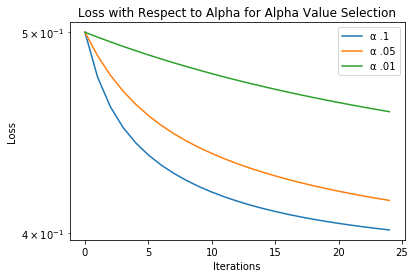

In [12]:
for lst in Loss_history:
    plt.semilogy(lst);
plt.title('Loss with Respect to Alpha for Alpha Value Selection')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.legend([ '\u03B1 .1', '\u03B1 .05', '\u03B1 .01']);


In [ ]:
with open(r"data/normalization_parameters.bin", "rb") as fh2:
     normalization_parameters = pickle.load(fh2)

def normalize_with_params(x):
    return{'area':(x-normalization_parameters[0][0])/normalization_parameters[0][1],'bedrooms':(x-normalization_parameters[1][0])/normalization_parameters[1][1],'price':(x-normalization_parameters[2][0])/normalization_parameters[2][1]}

def denormalize_with_params(x):
    return{'area':(x*normalization_parameters[0][1])+normalization_parameters[0][0],'bedrooms':(x*normalization_parameters[1][1])+normalization_parameters[1][0],'price':(x*normalization_parameters[2][1])+normalization_parameters[2][0]}

weights = np.array(gradient_descent(.1, y, X, w, 25)['final_weights'])
X2 = [1,normalize_with_params(1650)['area'],normalize_with_params(3)['bedrooms']]
X2 = np.array(X2)
print(X2)
print(weights)
prediction = np.sum(np.transpose(weights) * X2)

price = denormalize_with_params(prediction)['price']

print("Predicted price USD$%.2f" % price)